Project Question: By using Chronic Kidney Disease data gathered from 5 different hospitals in India create a prediction model which would be able by at least 65% accuracy predict if a person is likely to have developed a chronic kidney disease (CKD) 

Information about the data: <br>
    ○ 25 number of values (including class/label) <br>
    ○ 400 number of instances <br>
    ○ There are missing values <br>
    ○ Data was made public in 2015 <br>
    ○ Link to data source: http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease <br>

What is chronic kidney disease?
It is one of several kidney diseases that results a gradual loss of kidney functionality which could lead in death.
According to the statistics there were around 323 millions of people in the entire world which were affected by one or another form of this disease (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5055577/). 

Why this kind of project would be necessary and valuable?
Chronic kidney disease is a growing problem world-wide and therefore it is important to bring some more attention to it. CKD is comprised of 5 different stages and there are ways that the progression of kidney failure could be slowed down or stopped. Therefore it is very important to be able to discover people which are likely to have developed CKD as soon as possible.  

This project could be able to contribute to early discovering of patients who have developed CKD by looking in a number (24 in total) of factors which are said to be helpful while trying to indicate if a person has actually developed CKD.

Project delimitations: <br>
    ○ Data collected only from 1 country <br>
    ○ Relatively small (400) amount of instances <br>

## Imports

In [146]:
import pandas as pd
import numpy as np
# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

## Reading data

In [147]:
# Reading data table and assigning names for columns
readData = pd.read_table('chronic_kidney_disease_cleaned.arff', ',', header=None,
                         names=["age", "bloodPressure","specificGravity","albumin","sugar","redBloodCells","pusCell","pusCellClumps",
                                "bacteria", "bloodGlucoseRandom","bloodUrea","serumCreatinine","sodium",
                                "potassium","hemoglobin","packedCellVolume","whiteBloodCellCount",
                                "redBloodCellCount","hypertension","diabetesMellitus","coronaryArteryDisease",
                                "appetite","pedalEdema","anemia","class" ])
data = pd.DataFrame(readData);
# Number of collumns and rows
print("Rows and Columns", data.shape)

#Showing 10 first rows
#data.head(10)

Rows and Columns (400, 25)


## Data processing

### Cheking for missing data

In [148]:
# Replacing missing ("?") and ("\t?") data with NaN values
data = data.replace('?', np.NaN)
data = data.replace('\t?', np.NaN)

# Visualizing changed values
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [149]:
#Checking where is missing data by each column
# As it could be seen there is a lot of missing data in the table
missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

Columns and Number of missing data 
 age                        9
bloodPressure             12
specificGravity           47
albumin                   46
sugar                     49
redBloodCells            152
pusCell                   65
pusCellClumps              4
bacteria                   4
bloodGlucoseRandom        44
bloodUrea                 19
serumCreatinine           17
sodium                    87
potassium                 88
hemoglobin                52
packedCellVolume          71
whiteBloodCellCount      106
redBloodCellCount        131
hypertension               2
diabetesMellitus           3
coronaryArteryDisease      2
appetite                   1
pedalEdema                 1
anemia                     1
class                      0
dtype: int64


## Replacing nominal (text) values into numerical values

Replacing nominal (text) values with numerical values is important since otherwise we will not be able to work with most of the algorithms

In [150]:
# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
redBloodCells_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['redBloodCells'] = data['redBloodCells'].map(redBloodCells_mapping)

# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
pusCell_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCell'] = data['pusCell'].map(pusCell_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
pusCellClumps_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCellClumps'] = data['pusCellClumps'].map(pusCellClumps_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
bacteria_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['bacteria'] = data['bacteria'].map(bacteria_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
hypertension_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['hypertension'] = data['hypertension'].map(hypertension_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
diabetesMellitus_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['diabetesMellitus'] = data['diabetesMellitus'].map(diabetesMellitus_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
coronaryArteryDisease_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].map(coronaryArteryDisease_mapping)

# Making a map where 'good' will be converted into 1 and 'poor' will be converted into 0
appetite_mapping = {'good' : 1, 'poor' : 0}
# Making the actual convertion and replacing the values in the table
data['appetite'] = data['appetite'].map(appetite_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
pedalEdema_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['pedalEdema'] = data['pedalEdema'].map(pedalEdema_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
anemia_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['anemia'] = data['anemia'].map(anemia_mapping)


# Here we are working with mapping of the class label
# Making a map where 'ckd' will be converted into 1 and 'notckd' will be converted into 0
class_mapping = {'ckd' : 1, 'notckd' : 0}
# Making the actual convertion and replacing the values in the table
data['class'] = data['class'].map(class_mapping)

## Replacing missing data

Our strategy with missing data:
When there are some missing data in the table there could be couple of approaches how this problem could be solved. The easiest way could be to just remove those collumns that have an extensive amount of missing data. Even though we have a relatively high amount of data that is missing there are no collumns where the amount of missing data is higher then 90%. Therefore, we have chosen to find ways how to replace this data instead of removing it.

In [151]:
# Replace empty 'age' values by their columns average
data['age'] = data.age.astype(float)
data['age'].fillna((data['age'].mean()), inplace=True)
data['age'] = data.age.astype(int)

# Replace empty 'bloodPressure' values by their columns average
data['bloodPressure'] = data.bloodPressure.astype(float)
data['bloodPressure'].fillna((data['bloodPressure'].mean()), inplace=True)
data['bloodPressure'] = data.bloodPressure.astype(int)

#Replace empty 'specificGravity' values with most frequent value in the collumn
data['specificGravity'] = data['specificGravity'].fillna(data['specificGravity'].value_counts().index[0])
data['specificGravity'] = data.specificGravity.astype(float)

#Replace empty 'albumin' values with most frequent value in the collumn
data['albumin'] = data['albumin'].fillna(data['albumin'].value_counts().index[0])
data['albumin'] = data.albumin.astype(int)

#Replace empty 'sugar' values with most frequent value in the collumn
data['sugar'] = data['sugar'].fillna(data['sugar'].value_counts().index[0])
data['sugar'] = data.sugar.astype(int)

#Replace empty 'redBloodCells' values with most frequent value in the collumn
data['redBloodCells'] = data['redBloodCells'].fillna(data['redBloodCells'].value_counts().index[0])
data['redBloodCells'] = data.redBloodCells.astype(int)

#Replace empty 'pusCell' values with most frequent value in the collumn
data['pusCell'] = data['pusCell'].fillna(data['pusCell'].value_counts().index[0])
data['pusCell'] = data.pusCell.astype(int)

#Replace empty 'pusCellClumps' values with most frequent value in the collumn
data['pusCellClumps'] = data['pusCellClumps'].fillna(data['pusCellClumps'].value_counts().index[0])
data['pusCellClumps'] = data.pusCellClumps.astype(int)

#Replace empty 'bacteria' values with most frequent value in the collumn
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].value_counts().index[0])
data['bacteria'] = data.bacteria.astype(int)

#Replace empty 'bloodGlucoseRandom' values with most frequent value in the collumn
data['bloodGlucoseRandom'] = data['bloodGlucoseRandom'].fillna(data['bloodGlucoseRandom'].value_counts().index[0])
data['bloodGlucoseRandom'] = data.bloodGlucoseRandom.astype(int)

# Replace empty 'bloodUrea' values by their columns average
data['bloodUrea'] = data.bloodUrea.astype(float)
data['bloodUrea'].fillna((data['bloodUrea'].mean()), inplace=True)
data['bloodUrea'] = data.bloodUrea.astype(int)

# Replace empty 'serumCreatinine' values by their columns average
data['serumCreatinine'] = data.serumCreatinine.astype(float)
data['serumCreatinine'].fillna((data['serumCreatinine'].mean()), inplace=True)
data['serumCreatinine'] = data.serumCreatinine.astype(int)

# Replace empty 'sodium' values by their columns average
data['sodium'] = data.sodium.astype(float)
data['sodium'].fillna((data['sodium'].mean()), inplace=True)
data['sodium'] = data.sodium.astype(int)

# Replace empty 'potassium' values by their columns average
data['potassium'] = data.potassium.astype(float)
data['potassium'].fillna((data['potassium'].mean()), inplace=True)
data['potassium'] = data.potassium.astype(int)

# Replace empty 'hemoglobin' values by their columns average
data['hemoglobin'] = data.hemoglobin.astype(float)
data['hemoglobin'].fillna((data['hemoglobin'].mean()), inplace=True)
data['hemoglobin'] = data.hemoglobin.astype(int)

# Replace empty 'packedCellVolume' values by their columns average
data['packedCellVolume'] = data.packedCellVolume.astype(float)
data['packedCellVolume'].fillna((data['packedCellVolume'].mean()), inplace=True)
data['packedCellVolume'] = data.packedCellVolume.astype(int)

# Replace empty 'whiteBloodCellCount' values by their columns average
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(float)
data['whiteBloodCellCount'].fillna((data['whiteBloodCellCount'].mean()), inplace=True)
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(int)

# Replace empty 'redBloodCellCount' values by their columns average
data['redBloodCellCount'] = data.redBloodCellCount.astype(float)
data['redBloodCellCount'].fillna((data['redBloodCellCount'].mean()), inplace=True)
data['redBloodCellCount'] = data.redBloodCellCount.astype(int)

#Replace empty 'hypertension' values with most frequent value in the collumn
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].value_counts().index[0])
data['hypertension'] = data.hypertension.astype(int)

#Replace empty 'diabetesMellitus' values with most frequent value in the collumn
data['diabetesMellitus'] = data['diabetesMellitus'].fillna(data['diabetesMellitus'].value_counts().index[0])
data['diabetesMellitus'] = data.diabetesMellitus.astype(int)

#Replace empty 'coronaryArteryDisease' values with most frequent value in the collumn
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].fillna(data['coronaryArteryDisease'].value_counts().index[0])
data['coronaryArteryDisease'] = data.coronaryArteryDisease.astype(int)

#Replace empty 'appetite' values with most frequent value in the collumn
data['appetite'] = data['appetite'].fillna(data['appetite'].value_counts().index[0])
data['appetite'] = data.appetite.astype(int)

#Replace empty 'pedalEdema' values with most frequent value in the collumn
data['pedalEdema'] = data['pedalEdema'].fillna(data['pedalEdema'].value_counts().index[0])
data['pedalEdema'] = data.pedalEdema.astype(int)

#Replace empty 'anemia' values with most frequent value in the collumn
data['anemia'] = data['anemia'].fillna(data['anemia'].value_counts().index[0])
data['anemia'] = data.anemia.astype(int)

data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5,1,1,0,1,0,0,1.0
1,7,50,1.020,4,0,1,1,0,0,99,...,38,6000,4,0,0,0,1,0,0,1.0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4,0,1,0,0,0,1,1.0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3,1,0,0,0,1,1,1.0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4,0,0,0,1,0,0,1.0
5,60,90,1.015,3,0,1,1,0,0,74,...,39,7800,4,1,1,0,1,1,0,1.0
6,68,70,1.010,0,0,1,1,0,0,100,...,36,8406,4,0,0,0,1,0,0,1.0
7,24,76,1.015,2,4,1,0,0,0,410,...,44,6900,5,0,1,0,1,1,0,1.0
8,52,100,1.015,3,0,1,0,1,0,138,...,33,9600,4,1,1,0,1,0,1,1.0
9,53,90,1.020,2,0,0,0,1,0,70,...,29,12100,3,1,1,0,0,0,1,1.0


## Distribution of attributes

In this section we will visualize distribution of various attributes that are part of our data table. In this way we will be able to better understand with what kind of data we are working with and already see where could we find some possible candidates for outliers.

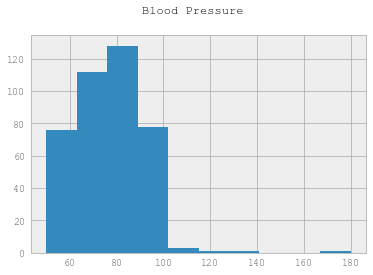

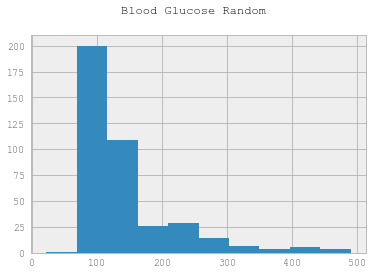

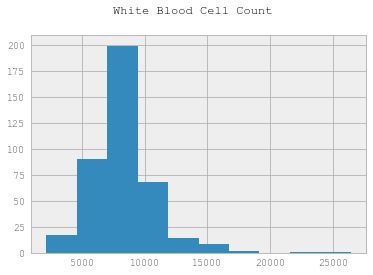

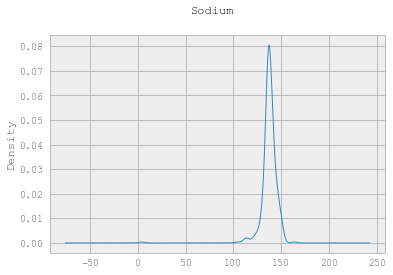

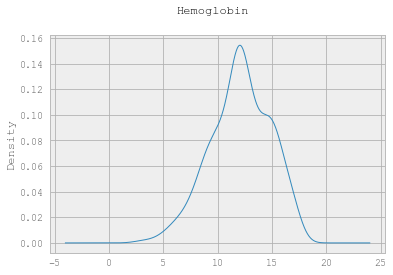

age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

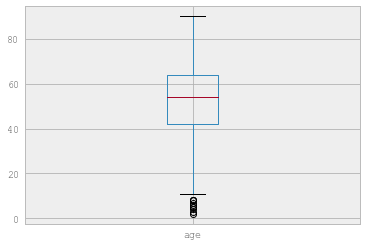

In [152]:

data["bloodPressure"].hist(grid=True)
plt.suptitle("Blood Pressure")
plt.show()

data["bloodGlucoseRandom"].hist(grid=True)
plt.suptitle("Blood Glucose Random")
plt.show()

data["whiteBloodCellCount"].hist(grid=True)
plt.suptitle("White Blood Cell Count")
plt.show()

data["sodium"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Sodium")
plt.show()

data["hemoglobin"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Hemoglobin")
plt.show()

data["age"].plot(kind='box', subplots=True, sharex=False, sharey=False)

## Outliers

In this section we are checking for outliers which are the data values that are far away from the average value inside a column. The outliers are found with a help of the average of the column values and also using standart deviation. <br>
While working with this part of the project we had to look into what kind of values or their differences are considered to be "normal". Therefore variation of inputs in some of the lines is different, since after closer inspection we have found out that such attributes like "Blood Glucose Random" may vary a lot in the real life therefore this kind of variation not necessarily mean errors in collecting the data <br>
We would also like to mention that the "Age" attribute is not being checked for possible outliers, because those values that are very different from the average value of this column are also most likely not a mistake. It is very possible, that the researchers who were working on collecting this data wanted to have a broader view of the situation therefore they have gathered data also from those patients who were much younger then the average. 

In [153]:

# Cheking for outliers in the "bloodPressure" column
data["bloodPressure"] = data["bloodPressure"][abs(data["bloodPressure"] - np.mean(data["bloodPressure"])) < 3 * np.std(data["bloodPressure"])]

# Cheking for outliers in the "bloodGlucoseRandom" column
data["bloodGlucoseRandom"] = data["bloodGlucoseRandom"][abs(data["bloodGlucoseRandom"] - np.mean(data["bloodGlucoseRandom"])) < 4 * np.std(data["bloodGlucoseRandom"])]

# Cheking for outliers in the "bloodUrea" column
data["bloodUrea"] = data["bloodUrea"][abs(data["bloodUrea"] - np.mean(data["bloodUrea"])) < 3 * np.std(data["bloodUrea"])]

# Cheking for outliers in the "serumCreatinine" column
data["serumCreatinine"] = data["serumCreatinine"][abs(data["serumCreatinine"] - np.mean(data["serumCreatinine"])) < 3 * np.std(data["serumCreatinine"])]

# Cheking for outliers in the "sodium" column
data["sodium"] = data["sodium"][abs(data["sodium"] - np.mean(data["sodium"])) < 4 * np.std(data["sodium"])]

# Cheking for outliers in the "potassium" column
data["potassium"] = data["potassium"][abs(data["potassium"] - np.mean(data["potassium"])) < 3 * np.std(data["potassium"])]

# Cheking for outliers in the "hemoglobin" column
data["hemoglobin"] = data["hemoglobin"][abs(data["hemoglobin"] - np.mean(data["hemoglobin"])) < 3 * np.std(data["hemoglobin"])]

# Cheking for outliers in the "packedCellVolume" column
data["packedCellVolume"] = data["packedCellVolume"][abs(data["packedCellVolume"] - np.mean(data["packedCellVolume"])) < 3 * np.std(data["packedCellVolume"])]

# Cheking for outliers in the "whiteBloodCellCount" column
data["whiteBloodCellCount"] = data["whiteBloodCellCount"][abs(data["whiteBloodCellCount"] - np.mean(data["whiteBloodCellCount"])) < 3 * np.std(data["whiteBloodCellCount"])]

# Cheking for outliers in the "redBloodCellCount" column
data["redBloodCellCount"] = data["redBloodCellCount"][abs(data["redBloodCellCount"] - np.mean(data["redBloodCellCount"])) < 3 * np.std(data["redBloodCellCount"])]

#print(data["redBloodCellCount"])

missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

#print(data["class"])

data.head(10)


Columns and Number of missing data 
 age                       0
bloodPressure             3
specificGravity           0
albumin                   0
sugar                     0
redBloodCells             0
pusCell                   0
pusCellClumps             0
bacteria                  0
bloodGlucoseRandom        3
bloodUrea                10
serumCreatinine           4
sodium                    1
potassium                 2
hemoglobin                1
packedCellVolume          2
whiteBloodCellCount       6
redBloodCellCount         1
hypertension              0
diabetesMellitus          0
coronaryArteryDisease     0
appetite                  0
pedalEdema                0
anemia                    0
class                     3
dtype: int64


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80.0,1.020,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,1,0,0,1.0
1,7,50.0,1.020,4,0,1,1,0,0,99.0,...,38.0,6000.0,4.0,0,0,0,1,0,0,1.0
2,62,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,0,0,1,1.0
3,48,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,0,1,1,1.0
4,51,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.0,0,0,0,1,0,0,1.0
5,60,90.0,1.015,3,0,1,1,0,0,74.0,...,39.0,7800.0,4.0,1,1,0,1,1,0,1.0
6,68,70.0,1.010,0,0,1,1,0,0,100.0,...,36.0,8406.0,4.0,0,0,0,1,0,0,1.0
7,24,76.0,1.015,2,4,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,1,1,0,1.0
8,52,100.0,1.015,3,0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,1,0,1,1.0
9,53,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,0,0,1,1.0


In [154]:
# Here we are removing all the rows which have missing data which was removed when we were looking for the outliers.
data.dropna(inplace=True)
# Here we are re-setting the indexes of the table
data.reset_index(drop=True, inplace=True)

## Correlation

In this part we are going to check if there are any correlating columns and will visualize it. <br>
Correlating columns are the ones which: <br>
○ Provide the same information, but just in different formats <br>
○ Are not very useful, because they do not provide that much of an information <br>
○ Could potentially confuse algorithm that we are using

Showing the correlation matrix using matplotlib.pyplot library <br>
The yeallow color means that columns are highly correlated while the blue ones mean that they are not correlated. As we can see from the matrix there are no higly correlated columns in our data table, therefore no columns are necessary to be removed. P.S. In our case the yellow spots in the table represents the same columns

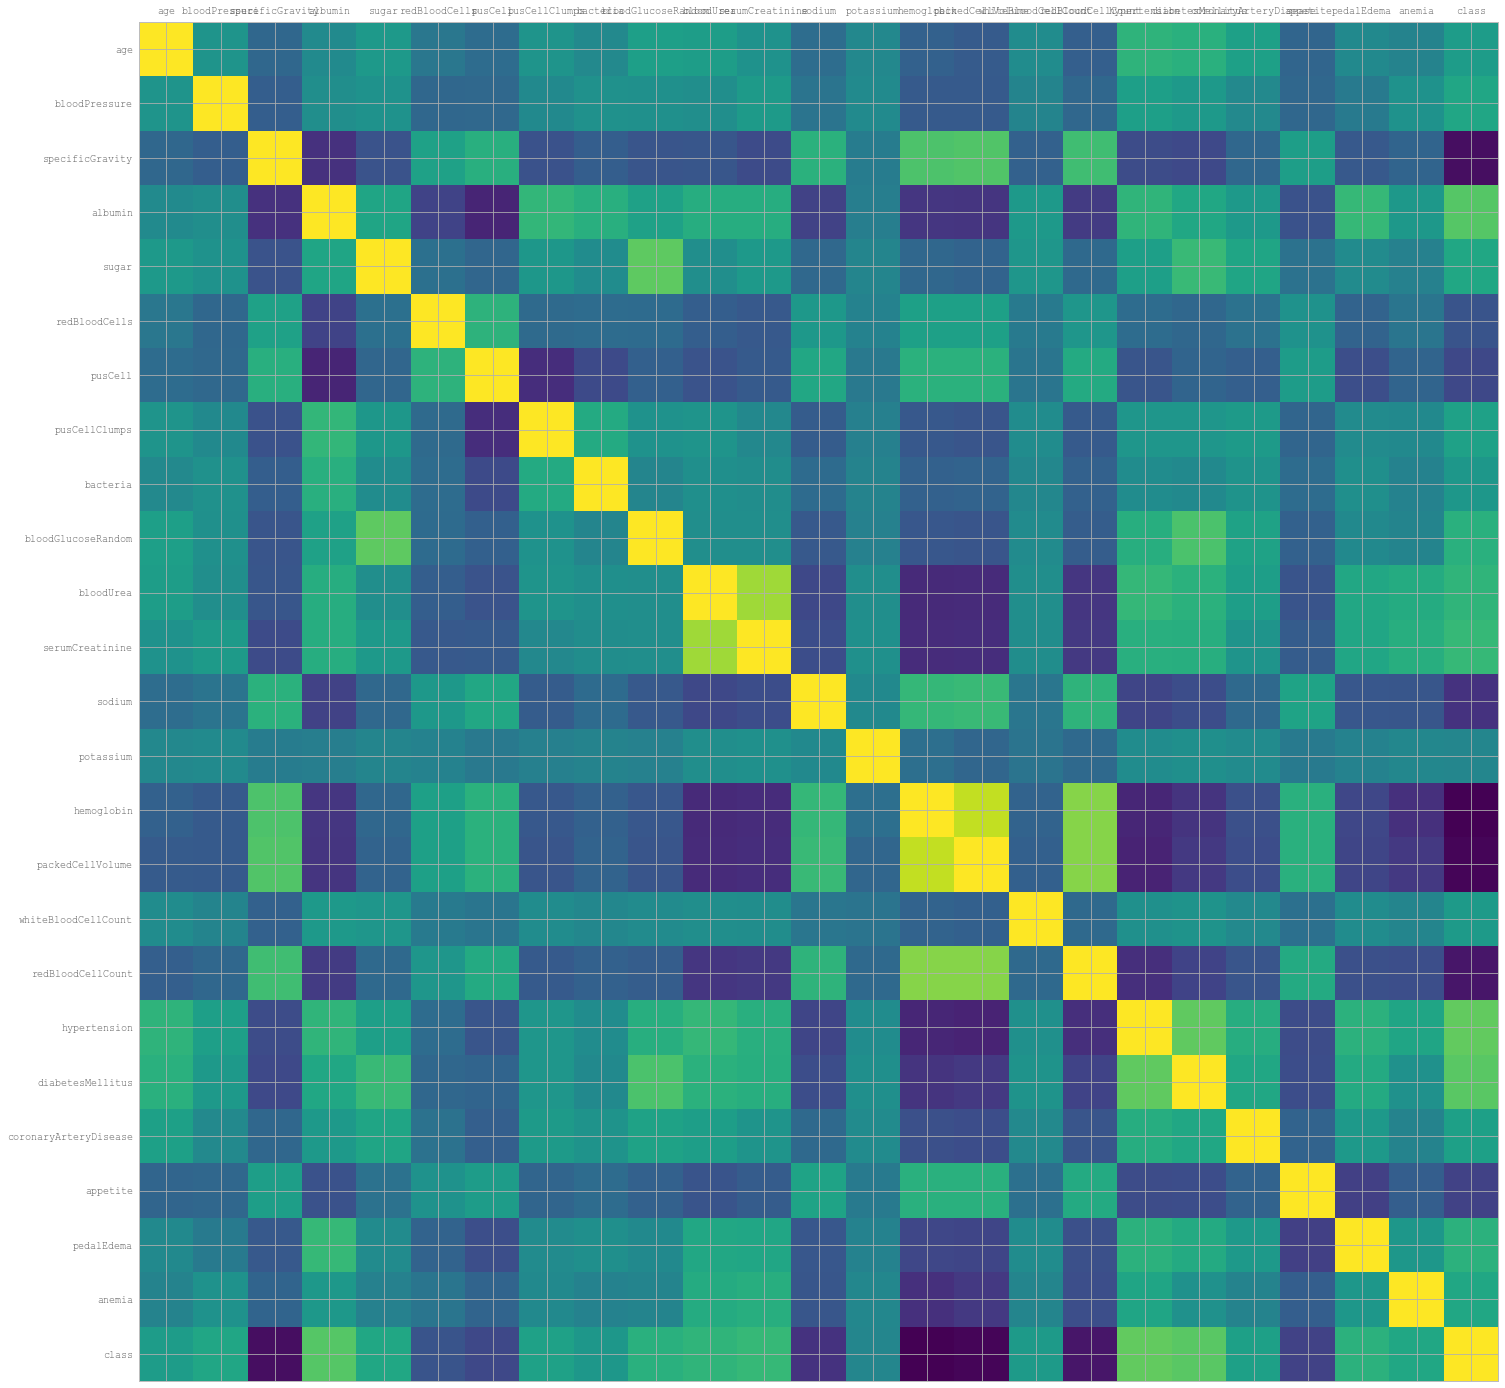

In [155]:

corr = data.corr()
fig, ax = plt.subplots(figsize=(25, 25))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);


## Feature Importance

In this section we will analyze which columns have biggers influence on the label and which ones are less important therefore could be possible candidates in removing them

In [157]:
#print (data.dtypes)
array = data.values
X = array[:,0:24]
Y = array[:,24]

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.00686695  0.01899704  0.11729366  0.12738563  0.00583145  0.00219201
  0.04116904  0.00227298  0.          0.01285865  0.01474077  0.02174296
  0.00649566  0.00139916  0.13758878  0.12086459  0.00333809  0.05576486
  0.14260018  0.0748123   0.          0.04318017  0.01975027  0.02285479]
